**Extracting Dataset using Kaggle API**

In [ ]:
#installing the Kaggle library
!pip install kaggle

In [ ]:
#Configuiring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset

In [ ]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:23<00:00, 44.4MB/s]
100% 812M/812M [00:23<00:00, 36.4MB/s]


In [ ]:
#Extracting the Dog vs Cat compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
#Extracting the Train.zip
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
import os
#Counting the number of images in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(f"There's {file_count} of files/images")

There's 25000 of files/images


In [ ]:
#Printing the name of the Images
file_names = os.listdir('/content/train')
print(file_names)

['dog.7728.jpg', 'dog.10395.jpg', 'dog.984.jpg', 'cat.8442.jpg', 'cat.7026.jpg', 'dog.1674.jpg', 'cat.10704.jpg', 'dog.7840.jpg', 'cat.2661.jpg', 'cat.6592.jpg', 'cat.11471.jpg', 'cat.5606.jpg', 'cat.8026.jpg', 'dog.580.jpg', 'cat.167.jpg', 'dog.10626.jpg', 'cat.8684.jpg', 'dog.8979.jpg', 'cat.7595.jpg', 'dog.353.jpg', 'dog.4098.jpg', 'cat.11851.jpg', 'dog.9635.jpg', 'dog.6006.jpg', 'dog.7338.jpg', 'cat.10579.jpg', 'dog.11866.jpg', 'dog.10293.jpg', 'dog.4379.jpg', 'dog.9040.jpg', 'dog.10488.jpg', 'cat.61.jpg', 'cat.1459.jpg', 'cat.658.jpg', 'cat.6995.jpg', 'cat.8788.jpg', 'dog.3712.jpg', 'cat.6805.jpg', 'cat.7518.jpg', 'cat.10912.jpg', 'dog.2743.jpg', 'cat.1115.jpg', 'dog.2369.jpg', 'dog.7424.jpg', 'cat.901.jpg', 'cat.11895.jpg', 'dog.4525.jpg', 'cat.9531.jpg', 'cat.8531.jpg', 'dog.6896.jpg', 'cat.6565.jpg', 'dog.708.jpg', 'dog.5970.jpg', 'cat.2641.jpg', 'dog.11830.jpg', 'dog.7526.jpg', 'dog.8729.jpg', 'dog.5667.jpg', 'cat.5415.jpg', 'dog.3773.jpg', 'cat.9915.jpg', 'cat.3393.jpg', 'dog

Importing the dependecies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the image of Dogs and Cats

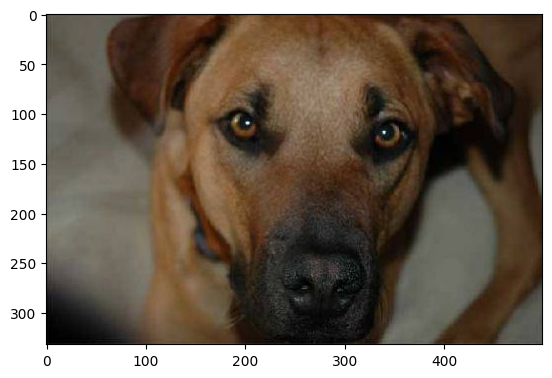

In [ ]:
#Display the image of a Dog
dog_img = mpimg.imread('/content/train/dog.5028.jpg')
plt.imshow(dog_img)

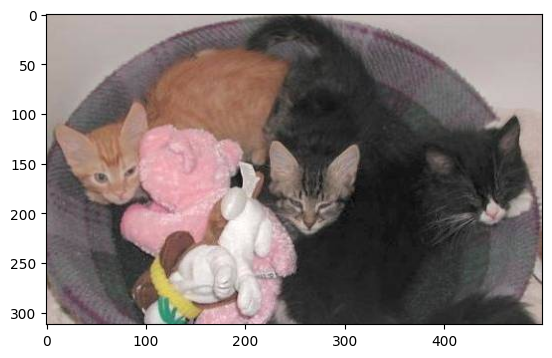

In [ ]:
#Display the image of a Cat
cat_img = mpimg.imread('/content/train/cat.1429.jpg')
plt.imshow(cat_img)

Counting the number of dogs and cats images

In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for i in range(len(file_names)):
  name = file_names[i]
  if name[0] == 'd':
    dog_count += 1
  else:
    cat_count += 1

print('The number of dog images =',dog_count)
print('The number of cat images =',cat_count)

The number of dog images = 12500
The number of cat images = 12500


Resizing an saving the images in new directory

In [ ]:
#Creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

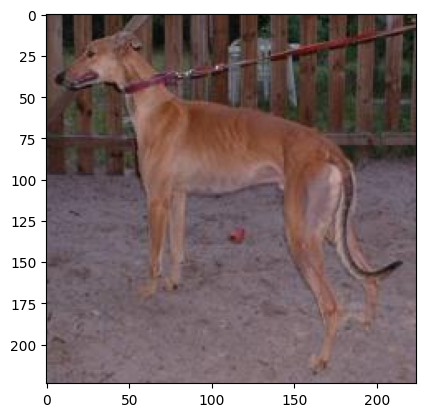

In [ ]:
#Display the resized dog image
dog_img = mpimg.imread('/content/image resized/dog.10395.jpg')
plt.imshow(dog_img)

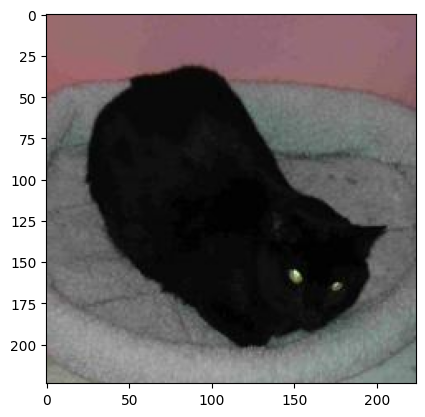

In [ ]:
#Display the resized cat image
cat_img = mpimg.imread('/content/image resized/cat.8442.jpg')
plt.imshow(cat_img)

**Creating labels for resized dog and cats images**
(Cat --> 0
Dog --> 1)

In [ ]:
#Creating a for loop to assign values to images
filename = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  if filename[i][0] == 'd':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(len(filename))
print(filename[0:20])
print(len(labels))
print(labels[0:20])

2000
['dog.7728.jpg', 'dog.10395.jpg', 'dog.984.jpg', 'cat.8442.jpg', 'cat.7026.jpg', 'dog.1674.jpg', 'cat.10704.jpg', 'dog.7840.jpg', 'cat.2661.jpg', 'cat.6592.jpg', 'cat.11471.jpg', 'cat.5606.jpg', 'cat.8026.jpg', 'dog.580.jpg', 'cat.167.jpg', 'dog.10626.jpg', 'cat.8684.jpg', 'dog.8979.jpg', 'cat.7595.jpg', 'dog.353.jpg']
2000
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]


In [ ]:
#Counting the total number of cat's and dog's images in the resized images
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1013  987]


Converting all the resized images to numpy arrays

In [ ]:
#Importing libs
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(type(dog_cat_images))
print(dog_cat_images)

<class 'numpy.ndarray'>
[[[[123 157 147]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  [[122 156 146]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  [[122 156 146]
   [122 156 146]
   [122 156 146]
   ...
   [115 146 143]
   [115 146 143]
   [115 146 143]]

  ...

  [[146 170 160]
   [151 175 165]
   [151 172 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]

  [[148 172 162]
   [151 175 165]
   [151 172 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]

  [[152 176 166]
   [153 177 167]
   [153 171 164]
   ...
   [199 202 200]
   [200 203 201]
   [201 204 202]]]


 [[[ 49  50  76]
   [ 58  59  85]
   [ 67  69  93]
   ...
   [ 29  46  37]
   [ 23  38  34]
   [ 35  50  46]]

  [[ 50  51  77]
   [ 59  60  86]
   [ 68  70  94]
   ...
   [ 28  44  37]
   [ 35  50  46]
   [ 57  71  69]]

  [[ 51  52  78]
   [ 61  62  88]
   [ 70  72  96]
   ...
   [ 39  53  51]
   [

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> Training Data

400 --> Test Data

In [ ]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.70588235 0.79607843 0.85882353]
   [0.70588235 0.79607843 0.85882353]
   [0.69803922 0.79215686 0.8627451 ]
   ...
   [0.16470588 0.30588235 0.49411765]
   [0.17254902 0.30588235 0.48627451]
   [0.17647059 0.30980392 0.49019608]]

  [[0.71372549 0.80392157 0.86666667]
   [0.71372549 0.80392157 0.86666667]
   [0.70980392 0.80392157 0.8745098 ]
   ...
   [0.16862745 0.31764706 0.50588235]
   [0.18039216 0.32156863 0.50196078]
   [0.18431373 0.3254902  0.50588235]]

  [[0.7254902  0.81568627 0.87843137]
   [0.7254902  0.81568627 0.87843137]
   [0.72156863 0.81568627 0.88627451]
   ...
   [0.16862745 0.3254902  0.51372549]
   [0.18039216 0.33333333 0.50980392]
   [0.18823529 0.34117647 0.51764706]]

  ...

  [[0.57254902 0.65882353 0.8       ]
   [0.57647059 0.6627451  0.80392157]
   [0.57254902 0.66666667 0.80784314]
   ...
   [0.09019608 0.18039216 0.36078431]
   [0.10196078 0.19607843 0.40784314]
   [0.09411765 0.19215686 0.41176471]]

  [[0.58431373 0.65882353 0.80784314]
   [0.5

**Building the Neural Network**

In [ ]:
!pip install --upgrade tensorflow tensorflow-hub
!pip install tensorflow
import tf_keras
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# URL for the MobileNetV2 feature vector from TensorFlow Hub
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Load the pretrained model from TensorFlow Hub as a KerasLayer
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

# Define the Sequential model
model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
# Train the model
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.2357 - acc: 0.8956
Epoch 2/5
50/50 [==============================] - 80s 2s/step - loss: 0.0757 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 86s 2s/step - loss: 0.0554 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: 0.0434 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 93s 2s/step - loss: 0.0340 - acc: 0.9931


In [ ]:
# Evaluating the test data on the model
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test loss:',score)
print('Test accuracy:',acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0620 - acc: 0.9775
Test loss: 0.06204892694950104
Test accuracy: 0.9775000214576721


**Predictive System**

Enter the path of the image to be predicted: /content/abc.png


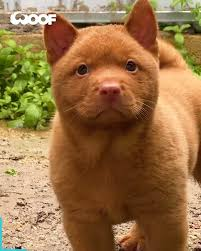

1/1 [==============================] - 0s 50ms/step
[[-2.0658286  1.2275836]]
1
The image is of a dog


In [ ]:
input_iamge_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_iamge_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')